In [2]:
import pandas as pd
import netaddr
%matplotlib inline

In [2]:
df = pd.read_csv('./data/all_portal_data_cleaned.csv')

In [3]:
df['firsttime'] = pd.to_datetime(df['firsttime'])
df['lasttime'] = pd.to_datetime(df['lasttime'])

In [4]:
# drops 1 row
df = df.dropna(subset=['inetnum'])

In [5]:
date_ranges = pd.date_range(start='2011-08', end='2017-04', freq='M')
print(date_ranges)

DatetimeIndex(['2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30',
               '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31',
               '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31',
               '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30',
               '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31',
               '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30',
               '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31',
               '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31',
               '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30',
               '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31',
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
      

In [6]:
metric_df = pd.DataFrame(index=df['as'].unique())

In [7]:
metric_df

""
AS9329
AS32613
AS7590
AS34104
AS21844
...
ASNA.103.196.240.0 - 103.196.243.255
AS201168
AS63759
AS53727


In [8]:
for i in range(len(date_ranges) - 1):
    start_month = date_ranges[i]
    end_month = date_ranges[i+1]
    counts = df.loc[[start < end_month and end > start_month for start, end in zip(df['firsttime'], df['lasttime'])]].groupby('as').count()['id']
    for asys in metric_df.index:
        metric_df.loc[asys, str(end_month.year) + '-' + str(end_month.month)] = (counts[asys] if asys in counts.index else 0)

In [9]:
for asys in metric_df.index:
    size = 0
    inetnums = df.loc[df['as'] == asys, 'inetnum'].unique()
    
    for iprange in inetnums:
        iprange = iprange.split('-')
        start_ip = iprange[0].strip(' ()')
        end_ip = iprange[1].strip(' ()')
        
        added_size = netaddr.iprange_to_cidrs(start_ip, end_ip)[0].size
        size += added_size
        
    metric_df.loc[asys, 'size'] = size

In [10]:
# Drop AS4766, AS3786, AS9318 because they had some weird inetnum values
metric_df.drop(['AS4766', 'AS3786', 'AS9318'], inplace=True)

In [11]:
def normalize_col(x, colname:str):
    x[colname + ' normalized'] = x[colname] / x['size']
    #print(x[[colname, colname + ' normalized']])
    return x

In [12]:
cols = metric_df.columns
for col in cols:
    metric_df = metric_df.apply(normalize_col, axis=1, colname=col)

/home/tom/econofcybsec/project_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [15]:
metric_df

,2011-9,2011-10,2011-11,2011-12,2012-1,2012-2,2012-3,2012-4,2012-5,2012-6,...,2016-7 normalized,2016-8 normalized,2016-9 normalized,2016-10 normalized,2016-11 normalized,2016-12 normalized,2017-1 normalized,2017-2 normalized,2017-3 normalized,size normalized
AS9329,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,1.0
AS32613,3.0,56.0,219.0,1306.0,1505.0,1809.0,2305.0,1035.0,575.0,956.0,...,0.000305,0.000316,0.000316,0.000301,0.000309,0.000309,0.000313,0.000320,0.000347,1.0
AS7590,1.0,2.0,2.0,2.0,3.0,3.0,14.0,5.0,5.0,8.0,...,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,1.0
AS34104,2.0,7.0,8.0,9.0,12.0,15.0,16.0,10.0,11.0,33.0,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,1.0
AS21844,4.0,57.0,88.0,443.0,585.0,634.0,715.0,486.0,335.0,360.0,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000086,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASNA.103.196.240.0 - 103.196.243.255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001953,1.0
AS201168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,1.0
AS63759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,1.0
AS53727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000488,1.0


In [17]:
#metric_df.to_csv('./data/monthly_data.csv', index_label=False)

In [3]:
metric_df = pd.read_csv('./data/monthly_data.csv')

In [4]:
metric_df

,2011-9,2011-10,2011-11,2011-12,2012-1,2012-2,2012-3,2012-4,2012-5,2012-6,...,2016-7 normalized,2016-8 normalized,2016-9 normalized,2016-10 normalized,2016-11 normalized,2016-12 normalized,2017-1 normalized,2017-2 normalized,2017-3 normalized,size normalized
AS9329,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,1.0
AS32613,3.0,56.0,219.0,1306.0,1505.0,1809.0,2305.0,1035.0,575.0,956.0,...,0.000305,0.000316,0.000316,0.000301,0.000309,0.000309,0.000313,0.000320,0.000347,1.0
AS7590,1.0,2.0,2.0,2.0,3.0,3.0,14.0,5.0,5.0,8.0,...,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,1.0
AS34104,2.0,7.0,8.0,9.0,12.0,15.0,16.0,10.0,11.0,33.0,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,1.0
AS21844,4.0,57.0,88.0,443.0,585.0,634.0,715.0,486.0,335.0,360.0,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000086,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASNA.103.196.240.0 - 103.196.243.255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001953,1.0
AS201168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,1.0
AS63759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,1.0
AS53727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000488,1.0


In [5]:
normalized_df = metric_df.loc[:, [col for col in metric_df.columns if col.find('normalized') > 0 or col == 'size']]

In [6]:
normalized_df

,size,2011-9 normalized,2011-10 normalized,2011-11 normalized,2011-12 normalized,2012-1 normalized,2012-2 normalized,2012-3 normalized,2012-4 normalized,2012-5 normalized,...,2016-7 normalized,2016-8 normalized,2016-9 normalized,2016-10 normalized,2016-11 normalized,2016-12 normalized,2017-1 normalized,2017-2 normalized,2017-3 normalized,size normalized
AS9329,18688.0,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000000,0.000000,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,1.0
AS32613,265472.0,0.000011,0.000211,0.000825,0.004920,0.005669,0.006814,0.008683,0.003899,0.002166,...,0.000305,0.000316,0.000316,0.000301,0.000309,0.000309,0.000313,0.000320,0.000347,1.0
AS7590,16384.0,0.000061,0.000122,0.000122,0.000122,0.000183,0.000183,0.000854,0.000305,0.000305,...,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183,1.0
AS34104,17152.0,0.000117,0.000408,0.000466,0.000525,0.000700,0.000875,0.000933,0.000583,0.000641,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,1.0
AS21844,151808.0,0.000026,0.000375,0.000580,0.002918,0.003854,0.004176,0.004710,0.003201,0.002207,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000086,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASNA.103.196.240.0 - 103.196.243.255,1024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001953,1.0
AS201168,1024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,1.0
AS63759,1024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,1.0
AS53727,2048.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000488,1.0


In [7]:
normalized_df['mean metric'] = normalized_df.iloc[:, 1:-1].mean(axis=1)
normalized_df = normalized_df.sort_values('mean metric', ascending=False)

In [8]:
normalized_df.drop(columns=['size normalized'], inplace=True)
normalized_df.rename(columns=lambda c: c.split(' ')[0], inplace=True)

In [9]:
normalized_df

,size,2011-9,2011-10,2011-11,2011-12,2012-1,2012-2,2012-3,2012-4,2012-5,...,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1,2017-2,2017-3,mean
"AS3, AS356",12.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,3.000000,3.000000,3.000000,3.000000,3.083333,3.083333,3.000000,3.000000e+00,3.000000,8.022388e-01
AS4148,1.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6.119403e-01
"AS3900, AS40034",768.0,0.0,0.005208,0.013021,0.019531,0.023438,0.027344,0.028646,0.029948,0.03125,...,0.257812,0.141927,0.122396,0.082031,0.061198,0.070312,0.063802,6.250000e-02,0.042969,4.690998e-01
as50482,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.910448e-01
AS45910,5.0,0.0,0.000000,0.000000,0.000000,0.000000,0.400000,0.400000,0.200000,0.00000,...,0.200000,0.200000,0.200000,0.200000,0.400000,0.400000,0.400000,4.000000e-01,0.400000,2.895522e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AS668,16777216.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.960464e-08,0.000000,8.896216e-10
AS714,16777216.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.896216e-10
ASNA.56.0.0.0 - 56.255.255.255,16777216.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,8.896216e-10
ASNA.185.56.232.0 - 185.56.235.255,1024.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00


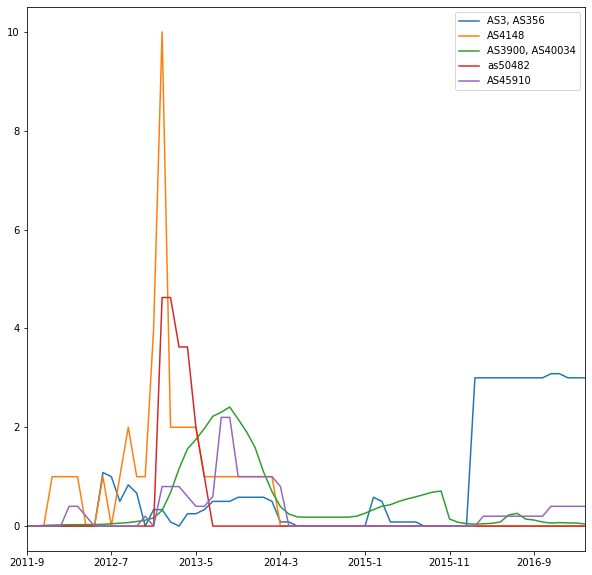

In [9]:
for i in range(5):
    normalized_df.iloc[i, 1:-1].plot(legend=True, figsize=(10, 10))

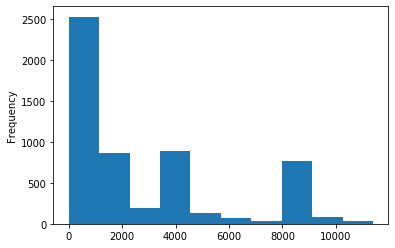

In [51]:
big_boys['size'].plot(kind='hist')

In [70]:
normalized_df['size'].describe()

count    8.027000e+03
mean     7.761163e+05
std      5.381252e+07
min      0.000000e+00
25%      1.024000e+03
50%      4.096000e+03
75%      1.664000e+04
max      4.819180e+09
Name: size, dtype: float64

In [50]:
#big_boys = normalized_df[((normalized_df['size'] - normalized_df['size'].mean()).abs() / normalized_df['size'].std()) < 3]
big_boys = normalized_df[(normalized_df['size'] - 1500).abs() < 10000]

Text(0, 0.5, 'Average NDM value')

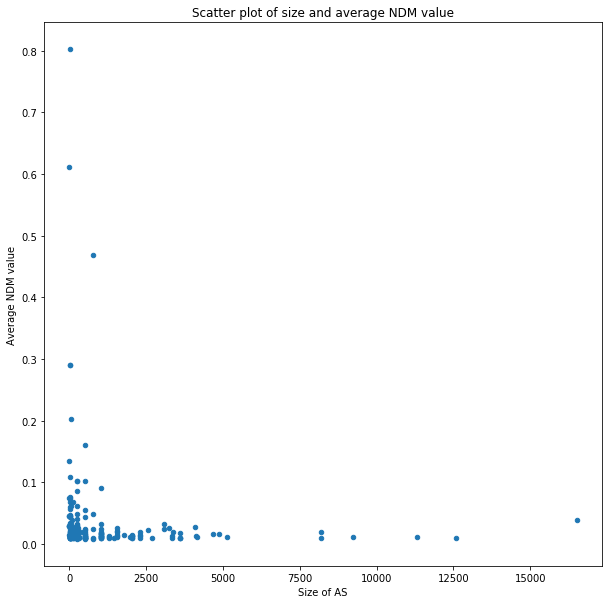

In [53]:
plot_df = normalized_df.iloc[:200]
plot_df = plot_df.loc[plot_df['size'] < 20000]
plot = plot_df.plot(kind='scatter', legend=True, x='size', y='mean', title='Scatter plot of size and average NDM value', figsize=(10,10))
plot.set_xlabel('Size of AS')
plot.set_ylabel('Average NDM value')

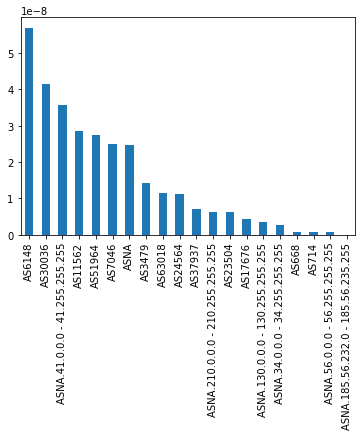

In [11]:
normalized_df.iloc[-21:-1, -1].plot(kind='bar')

In [55]:
normalized_df.columns

Index(['size', '2011-9', '2011-10', '2011-11', '2011-12', '2012-1', '2012-2',
       '2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8', '2012-9',
       '2012-10', '2012-11', '2012-12', '2013-1', '2013-2', '2013-3', '2013-4',
       '2013-5', '2013-6', '2013-7', '2013-8', '2013-9', '2013-10', '2013-11',
       '2013-12', '2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6',
       '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12', '2015-1',
       '2015-2', '2015-3', '2015-4', '2015-5', '2015-6', '2015-7', '2015-8',
       '2015-9', '2015-10', '2015-11', '2015-12', '2016-1', '2016-2', '2016-3',
       '2016-4', '2016-5', '2016-6', '2016-7', '2016-8', '2016-9', '2016-10',
       '2016-11', '2016-12', '2017-1', '2017-2', '2017-3', 'mean'],
      dtype='object')

Text(0.5, 0, 'Autonomous Systems')

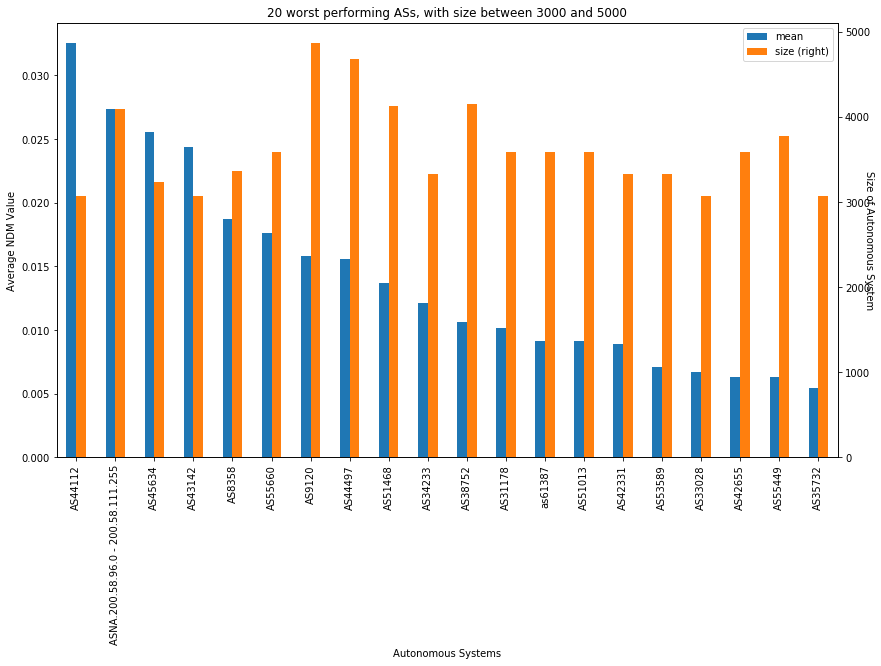

In [72]:
plot_df = normalized_df.loc[normalized_df['size'] > 3000]
plot_df = plot_df.loc[plot_df['size'] < 5000]
plot_df = plot_df.iloc[:20]
plot = plot_df.plot(kind='bar', y=['mean', 'size'], secondary_y=['size'],figsize=(14,8), title='20 worst performing ASs, with size between 3000 and 5000')
plot.set_ylabel('Average NDM Value')
plot.right_ax.set_ylabel('Size of Autonomous System', rotation=-90)
plot.set_xlabel('Autonomous Systems')

In [81]:
normalized_df.columns

Index(['size', '2011-9', '2011-10', '2011-11', '2011-12', '2012-1', '2012-2',
       '2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8', '2012-9',
       '2012-10', '2012-11', '2012-12', '2013-1', '2013-2', '2013-3', '2013-4',
       '2013-5', '2013-6', '2013-7', '2013-8', '2013-9', '2013-10', '2013-11',
       '2013-12', '2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6',
       '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12', '2015-1',
       '2015-2', '2015-3', '2015-4', '2015-5', '2015-6', '2015-7', '2015-8',
       '2015-9', '2015-10', '2015-11', '2015-12', '2016-1', '2016-2', '2016-3',
       '2016-4', '2016-5', '2016-6', '2016-7', '2016-8', '2016-9', '2016-10',
       '2016-11', '2016-12', '2017-1', '2017-2', '2017-3', 'mean'],
      dtype='object')

Text(0, 0.5, 'Normalized Defacement Count per Month')

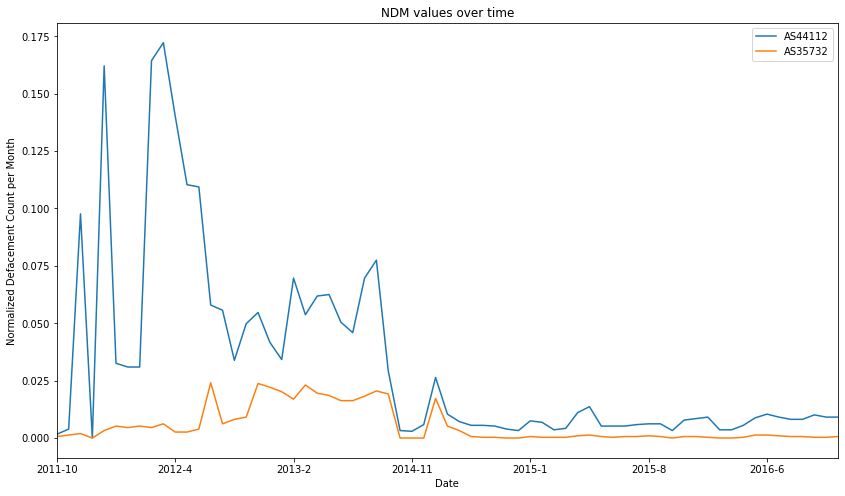

In [89]:
for i in ['AS44112', 'AS35732']:
    plot = normalized_df.loc[i, normalized_df.columns.difference(['size', 'mean'])].plot(legend=True, figsize=(14, 8), title='NDM values over time')
plot.set_xlabel('Date')
plot.set_ylabel('Normalized Defacement Count per Month')

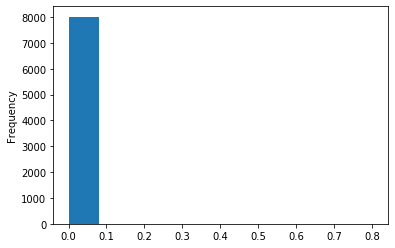

In [12]:
normalized_df['mean'].plot(kind='hist')

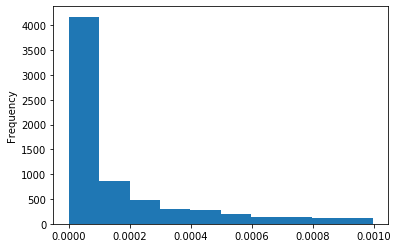

In [13]:
normalized_df.loc[normalized_df['mean'] <= 0.001, 'mean'].plot(kind='hist')

In [16]:
normalized_df['mean'].describe()

count    8026.000000
mean        0.001392
std         0.014378
min         0.000000
25%         0.000015
50%         0.000087
75%         0.000466
max         0.802239
Name: mean, dtype: float64

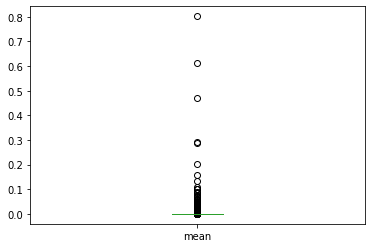

In [17]:
normalized_df['mean'].plot(kind='box')